In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from google.colab import auth

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

dataset = drive.CreateFile({'id': '1BDMPjvS-5yBi7XZve2maVnFMsQWuoa-7'})
dataset.GetContentFile('dataset')

data=pd.read_csv('dataset')

data = data.drop(['Flow ID'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['Timestamp'], axis=1)


nonImportantColumns = [
'Source IP',
'Destination IP',
'Protocol',
'Flow Duration',
'Total Fwd Packets',
'Total Backward Packets',
'Fwd Packet Length Std',
'Bwd Packet Length Std',
'Flow Bytes/s',
'Flow Packets/s',
'Flow IAT Max',
'Fwd IAT Total',
'Fwd IAT Max',
'Bwd IAT Total',
'Bwd IAT Std',
'Bwd IAT Max',
'Bwd IAT Min',
'Fwd PSH Flags',
'Bwd PSH Flags',
'Fwd URG Flags',
'Bwd URG Flags',
'Fwd Header Length',
'Bwd Header Length',
'Fwd Packets/s',
'Packet Length Std',
'FIN Flag Count',
'SYN Flag Count',
'RST Flag Count',
'PSH Flag Count',
'ACK Flag Count',
'URG Flag Count',
'CWE Flag Count',
'ECE Flag Count',
'Down/Up Ratio',
'Fwd Header Length.1',
'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate',
'Subflow Fwd Packets',
'Subflow Bwd Packets',
'act_data_pkt_fwd',
'min_seg_size_forward',
'Active Std',
'Active Max',
'Active Min',
'Idle Mean',
'Idle Std',
'Idle Max',
'Idle Min',
'SimillarHTTP',
'Inbound'
]
for column in nonImportantColumns :
 data = data.drop([column], axis=1)

#data['Source IP']=pd.get_dummies(data['Source IP'], prefix='Source IP')
#data['Destination IP']=pd.get_dummies(data['Destination IP'], prefix='Destination IP')
#data['Flow Bytes/s']=pd.get_dummies(data['Flow Bytes/s'], prefix='Flow Bytes/s')
#data['Flow Packets/s']=pd.get_dummies(data['Flow Packets/s'], prefix='Flow Packets/s')
#data['Timestamp']=pd.get_dummies(data['Timestamp'], prefix='Timestamp')
#data['SimillarHTTP']=pd.get_dummies(data['SimillarHTTP'], prefix='SimillarHTTP')

data.columns = data.columns.str.replace(' ', '_')

data['Label']=data['Label'].map( {'BENIGN':0, 'DrDoS_DNS':1, 'DrDoS_LDAP':1, 'DrDoS_MSSQL':1, 'DrDoS_NetBIOS':1, 'DrDoS_NTP':1, 'LDAP':1, 
                                            'DrDoS_SSDP':1, 'DrDoS_UDP':1, 'NetBIOS':1, 'Portmap':1, 'Syn':1, 'TFTP':1, 'UDP':1, 'UDPLag':1, 'UDP-lag':1, 'WebDDoS':1, 'MSSQL':1,   } )
data.reset_index()

import numpy as np 
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

y_eval = data.pop("Label")
x = data
y = y_eval

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,shuffle=True, random_state=None)
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)


title: DDOS_2019_Sample_File.csv, id: 1g5Bt3iIEQ2ob-v3Us0dM3BUCYjqkhZFq
title: DDOS_Train - Copy.xlsx, id: 12AH-hKoMZgQDEvV1fxJq-j58kpA46MF0
title: DDOS_Train.xlsx, id: 17pgNoCZ7BtSYc1wIypBDSkiJNbIUSSdx
title: DDOS_Test.csv, id: 1sKD6QuBVyaEDjPb-mCDkPjwfAd8-YaDm
title: NSL_KDD_Train.csv, id: 1NdNFFeHHC7_wbGl67owDY340O-DzwAOn
title: DrDoS_NTP_Train.csv, id: 1UtZFETT1ldMj2FRvq6vkDWlzkxxnhJ5s
title: Portmap-train - 10.csv, id: 1nvW3yWfVj3Sm8KlT069w0TtbMvzDu9x2
title: Colab Notebooks, id: 1-gHxYdhAkhUseRaT3gzWT4MPxPDP8fmX
title: RM1 Submission, id: 1ulNMgBVt790mNJ3D5j79ppRmQ_i35rBV
title: Hash and sc, id: 1P-3Ta-F1e7MzcbtW0zGM1C0I-Z9eDh3G
title: Ecommerce Project SS, id: 1LLQZAzE4m59vlgzsy_Wkx37LPSAJVRYY
title: Manish Patel_New-CV.docx, id: 1I6uOjjOtvhwDWTbNiQf0y6Z2pA9dxcez
title: Patel, Manishkumar VOE 08-31-19.pdf, id: 0B_gPr3BosfdmYnN0bjdJVnhSbmJlVk5zMGdKa2k0S3NrbkhN
title: Getting started, id: 0B_gPr3Bosfdmc3RhcnRlcl9maWxlX2Rhc2hlclYw


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,4,7,85,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Accuracy: 0.9681
ROC_AUC  0.9681733769360155


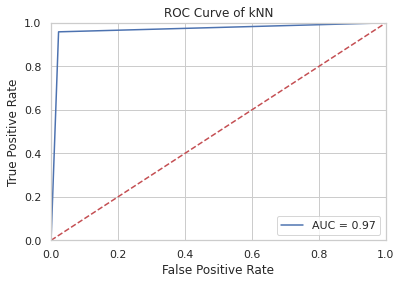

In [ ]:
# LA Start
#Classifier implementing the k-nearest neighbors vote.
knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train,y_train)
knn.predict(X_test)

print("Accuracy: {:.4f}".format(knn.score(X_test, y_test)))
# LA End


# HA Start
"""
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)
knn.predict(X_test)

print("Accuracy: {:.4f}".format(knn.score(X_test, y_test)))


knn_cv = KNeighborsClassifier(n_neighbors=2)
cv_scores = cross_val_score(knn_cv, x, y, cv=2)
print(cv_scores)
print('cv_scores mean:{}' .format(np.mean(cv_scores)))
"""
# HA End

# Predict output/label for Testing data inputs
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1].round())

roc_auc = auc(fpr, tpr)
print("ROC_AUC ", roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

sensitivity: 0.958735, specificity: 0.977612


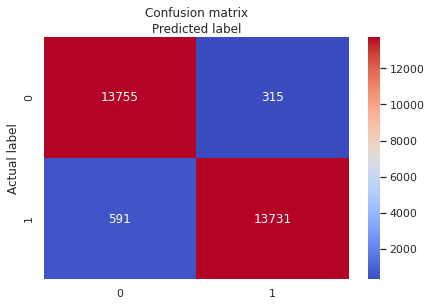

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
cnf_matrix = metrics.confusion_matrix(y_test,y_scores[:, 1].round())
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
sensitivity = TP / float(FN + TP)

#When the actual value is positive, how often is the prediction correct?
#When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print('sensitivity: %0f, specificity: %0f' % (sensitivity,specificity))

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_scores[:, 1].round())
print('precision ', precision)
print('recall ', recall)
print('thresholds ', thresholds)

from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_scores[:, 1].round())
print('f1_score',f1)

precision  [0.50443787 0.97757369 1.        ]
recall  [1.         0.95873481 0.        ]
thresholds  [0. 1.]
f1_score 0.9680626057529611
